# Progetto di  Applicazioni Data Intensive

Progetto svolto nell'anno accademico 2024-2025 da:
- Filippo Massari 0001071420
- Francesco Pazzaglia 0001077423

## Introduzione
I dati presi in esame riguardano lo stile di vita di circa 80.000 studenti includendo dati come: l'ambiente di studio, la salute mentale, background familiare, motivazione e fattori ambientali.

Il dataset è stato preso su [Kaggle](https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset).

Ci poniamo come obiettivo quello di sfruttare i dati precedentemente descritti per ricavarne una predizione delle performance studentesche del soggetto preso in analisi. 

## Implementazione

### Caricamento delle librerie

Per prima cosa importiamo le librerie che ci serviranno per poter manipolare ed effettuare operazioni sui dati ottenuti all'interno del dataset. Tra cui:

- *NumPy* per l'elaborazione numerica in Python di array e matrici;

- *pandas* per l'importazione ed esportazione dei dati;

- *matplotlib* per la rappresentazione grafica dei risultati ottenuti;
    - importiamo il modulo di matplotlib inline per far in modo che gli output vengano renderizzati direttamente nel file Jupyter piuttosto che all'esterno

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Caricamento dei dati

Carichiamo il dataset delle abitudini degli studenti, che contiene informazioni dettagliate sulle loro routine quotidiane, le attività accademiche, lo stile di vita e altri fattori che possono influenzare le loro performance scolastiche.

In [5]:
import os.path
file = "./data/enhanced_student_habits_performance_dataset.csv"
if not os.path.exists(file):
    print("Missing datasets, retrievit from kaggle: https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset")
    
students = pd.read_csv(file, index_col=0)

In [6]:
print(students.columns.tolist())

['age', 'gender', 'major', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'previous_gpa', 'semester', 'stress_level', 'dropout_risk', 'social_activity', 'screen_time', 'study_environment', 'access_to_tutoring', 'family_income_range', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'learning_style', 'time_management_score', 'exam_score']


### Significato delle colonne del Dataset

| #  | Variabile                          | Descrizione                                                                 |
|----|------------------------------------|-----------------------------------------------------------------------------|
| 0  | **student_id**                     | Codice unico ed identificativo dello studente                               |
| 1  | **age**                            | Età dello studente (16–28 anni)                                             |
| 2  | **gender**                         | Genere: Maschile, Femminile o Altro                                         |
| 3  | **major**                          | Corso di laurea o area di studio (es. Informatica, Ingegneria, Arti)        |
| 4  | **study_hours_per_day**            | Ore medie di studio giornaliere                                             |
| 5  | **social_media_hours**             | Ore trascorse sui social media                                              |
| 6  | **netflix_hours**                  | Ore trascorse a guardare Netflix                                            |
| 7  | **part_time_job**                  | Se lo studente ha un lavoro part-time (Sì/No)                               |
| 8  | **attendance_percentage**          | Percentuale di frequenza alle lezioni                                       |
| 9  | **sleep_hours**                    | Ore di sonno giornaliere                                                    |
| 10 | **diet_quality**                   | Qualità della dieta                                                         |
| 11 | **exercise_frequency**             | Frequenza dell’attività fisica                                              |
| 12 | **parental_education_level**       | Livello di istruzione dei genitori                                          |
| 13 | **internet_quality**               | Qualità della rete Internet                                                 |
| 14 | **mental_health_rating**           | Valutazione dello stato di salute mentale (1–10)                            |
| 15 | **extracurricular_participation**  | Partecipazione ad attività extracurriculari                                 |
| 16 | **previous_gpa**                   | Media dei voti precedenti                                                   |
| 17 | **semester**                       | Semestre dello studente                                                     |
| 18 | **stress_level**                   | Livello di stress (1–10)                                                    |
| 19 | **dropout_risk**                   | Rischio di abbandono degli studi (Sì/No) — derivato da stress e motivazione |
| 20 | **social_activity**                | Numero di eventi sociali settimanali                                        |
| 21 | **screen_time**                    | Tempo complessivo trascorso davanti agli schermi                            |
| 22 | **study_environment**              | Ambiente abituale di studio                                                 |
| 23 | **access_to_tutoring**             | Accesso a servizi di tutoraggio (Sì/No)                                     |
| 24 | **family_income_range**            | Fascia di reddito familiare                                                 |
| 25 | **parental_support_level**         | Livello di supporto da parte dei genitori                                   |
| 26 | **motivation_level**               | Livello di motivazione (1–10)                                               |
| 27 | **exam_anxiety_score**             | Punteggio di ansia da esame (1–10)                                          |
| 28 | **learning_style**                 | Stile di apprendimento preferito                                            |
| 29 | **time_management_score**          | Punteggio di capacità di gestione del tempo (1–10)                          |
|    |                                              |
| 30 | **exam_score**                     | **Valore da predire: punteggio all’esame**                                  |

In [7]:
students

,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
student_id,,,,,,,,,,,,,,,,,,,,,
100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,Poor,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,Good,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,Good,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,Fair,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,Good,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,16,Male,Engineering,3.700000,2.1,1.0,Yes,80.8,6.1,Fair,...,8.3,Library,No,Low,1,4,10,Auditory,5.3,88
179996,16,Female,Business,1.200000,0.4,2.9,No,99.5,4.1,Good,...,4.7,Co-Learning Group,No,Low,3,2,10,Kinesthetic,6.8,52
179997,26,Female,Arts,4.100000,1.6,1.6,Yes,46.1,8.3,Good,...,7.5,Dorm,No,Medium,7,1,10,Visual,1.3,89


### Preparazione dei dati

Procediamo a verificare la presenza o meno di tutti i valori delle colonne del dataset.

In [8]:
missing_values = students.isnull().sum()
print("Valori mancanti per colonna:")
print(missing_values[missing_values > 0])

Valori mancanti per colonna:
Series([], dtype: int64)


Il dataset non contiene valori mancanti, questo ci permette di utilizzare tutte le colonne senza problemi.

Visualizziamo ora le informazioni presenti nel dataset, così da verificarne le features e il loro peso complessivo in memoria.

In [9]:
students.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 100000 to 179999
Columns: 30 entries, age to exam_score
dtypes: float64(10), int64(8), object(12)
memory usage: 68.4 MB


Notiamo che il dataset occupa abbastanza spazio in memoria quindi proviamo a ricaricarlo specificando quali dati gestire come categorici.

Quindi definiamo l’elenco delle colonne da trattare come categorical e al caricamento ne specifichiamo il tipo. Andiamo infine a ricalcolare la dimensione del file costatando una netta diminuzione dello spazio occupato rispetto all'originale.

In [10]:
cols_to_cat = [
    'gender', 'major', 'part_time_job', 'diet_quality',
    'study_environment', 'access_to_tutoring',
    'family_income_range', 'parental_support_level',
    'parental_education_level', 'learning_style'
]

dtype = {col: 'category' for col in cols_to_cat}
students = pd.read_csv(file, dtype=dtype)

for col in cols_to_cat:
    students[col] = students[col].astype('category')

students.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 31 entries, student_id to exam_score
dtypes: category(10), float64(10), int64(8), object(3)
memory usage: 25.5 MB


Facendo questo passaggio, possiamo notare come siamo riusciti a ridurre lo spazio in memoria di circa 2/3, quindi da circa 60 MB a circa 20MB.

Andiamo ora a visualizzare la prima riga del nostro dataset e a definire tutte le colonne che possono essere rimosse o collassate con altre, così da preparare e rendere omogenei i dati.

In [11]:
students.head(1)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100


Riteniamo che alcune colonne del dataset siano assimilabili per similarità dei dati forniti, quindi procediamo ad accorparle per attinenza semantica. Procediamo dunque a unire le colonne "social_media_hours" e "netflix_hours" dato che entrambi fanno riferimento alle ore di intrattenimento, andiamo dunque a creare la colonna "screen_entertainment_hours" come somma delle due precedenti.

In [12]:
students["screen_entertainment_hours"] = students["social_media_hours"] + students["netflix_hours"]
students.drop(columns=["social_media_hours", "netflix_hours"], inplace=True)
ent = students.pop("screen_entertainment_hours")
students.insert(loc=5, column="screen_entertainment_hours", value=ent)

Estraiamo inoltre il tempo di utilizzo di tecnologie dedicato ad attività produttive o con attinenza scolastica, dato interessante per i nostri fini. Lo ricaviamo in maniera molto semplice sottraendo al tempo di utilizzo di dispositivi elettronici quello dedicato all'intrattenimento.

In [13]:
students["screen_productivity_hours"] = students["screen_time"] - students["screen_entertainment_hours"]
prod = students.pop("screen_productivity_hours")
students.insert(loc=6, column="screen_productivity_hours", value=prod)

Per via dell'approsimazione decimale dovuta al cast implicito dei tipi di python diversi otteniamo, in alcuni isolati casi, dei valori fuori scala. Nello specifivo quando il valore dovrebbe risultare essere zero può accadere che le cifre decimali producano un'intorno molto stretto di zero che mando in over o under flow il dato. Proceduamo dunque ad identificare questi casi.

In [14]:
outlier_screen_productivity = students[(students['screen_productivity_hours'] < 0)]

outlier_screen_productivity[["screen_productivity_hours", "screen_time", "screen_entertainment_hours"]]

,screen_productivity_hours,screen_time,screen_entertainment_hours
33323,-5.551115e-17,0.3,0.3
34320,-4.440892e-16,3.8,3.8
42684,-8.881784e-16,6.3,6.3
45754,-4.440892e-16,3.3,3.3


Essendo numericamente molto limitati ci limitiamo ad usare la funzione clip() per gestire queste poche eccezioni, ovvero 4 su 80.000 

In [15]:
students["screen_productivity_hours"] = students["screen_productivity_hours"].clip(lower=0)

Procediamo infine a verificare l'assenza di dati fuori scala.

In [16]:
outlier_screen_productivity = students[(students['screen_productivity_hours'] < 0) ]

outlier_screen_productivity[["screen_productivity_hours", "screen_time", "screen_entertainment_hours"]]

,screen_productivity_hours,screen_time,screen_entertainment_hours


Definiamo ora delle categorie sulla base della attinenza semantica dei dati per poter raggruppare tutte le features affini tra loro. 

In [17]:
category_order = [
    "Identifiers",
    "Demographics",
    "Academic Engagement",
    "Lifestyle & Health",
    "Screen Activity",
    "Family & Socioeconomic Support",
    "Personal Skills",
    "Behavior & Preferences",
    "Outcomes"
]

category_map = {
    "student_id": "Identifiers",

    "age":       "Demographics",
    "gender":    "Demographics",
    "major":     "Demographics",

    "semester":                      "Academic Engagement",
    "study_hours_per_day":           "Academic Engagement",
    "attendance_percentage":         "Academic Engagement",
    "access_to_tutoring":            "Academic Engagement",
    "extracurricular_participation": "Academic Engagement",
    "previous_gpa":                  "Academic Engagement",


    "sleep_hours":          "Lifestyle & Health",
    "diet_quality":         "Lifestyle & Health",
    "exercise_frequency":   "Lifestyle & Health",
    "mental_health_rating": "Lifestyle & Health",
    "stress_level":         "Lifestyle & Health",
    "exam_anxiety_score":   "Lifestyle & Health",

    "screen_time":                "Screen Activity",
    "screen_productivity_hours":  "Screen Activity",
    "screen_entertainment_hours": "Screen Activity",
    "social_activity":            "Screen Activity",

    "family_income_range":      "Family & Socioeconomic Support",
    "parental_education_level": "Family & Socioeconomic Support",
    "parental_support_level":   "Family & Socioeconomic Support",
    "internet_quality":         "Family & Socioeconomic Support",
    
    
    "time_management_score": "Personal Skills",
    "motivation_level":      "Personal Skills",
    "learning_style":        "Personal Skills",

    
    "part_time_job":      "Behavior & Preferences",
    "dropout_risk":       "Behavior & Preferences",
    "study_environment":  "Behavior & Preferences",

    "exam_score":   "Outcomes"
}


Procediamo ora ad assegare e riordinare i dati

In [18]:
missing_cols = [col for col in students.columns if col not in category_map]
if missing_cols:
    raise ValueError(f"The following columns are not present in category_map: {missing_cols}")

cols_sorted = sorted(
    students.columns,
    key=lambda col: category_order.index(category_map[col])
)

students = students[cols_sorted]

In [19]:
print(students.columns.tolist())

['student_id', 'age', 'gender', 'major', 'study_hours_per_day', 'attendance_percentage', 'extracurricular_participation', 'previous_gpa', 'semester', 'access_to_tutoring', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'mental_health_rating', 'stress_level', 'exam_anxiety_score', 'screen_entertainment_hours', 'screen_productivity_hours', 'social_activity', 'screen_time', 'parental_education_level', 'internet_quality', 'family_income_range', 'parental_support_level', 'motivation_level', 'learning_style', 'time_management_score', 'part_time_job', 'dropout_risk', 'study_environment', 'exam_score']


### Analisi generale dei dati

Nella parte di analisi dei dati andiamo a visualizzare alcune statistiche dei dati appartenenti al dominio applicativo, tramite tabelle e grafici. Di conseguenza a ciò, andiamo a suddividere la parte di analisi sotto il punto di vista grafico e matematico.

#### Aspetto grafico

Analizziamo alcune statistiche descrittive mediante l'utilizzo di grafici per poterne acquisire consapevolezza dei dati e delle caratteristiche del contesto applicativo facendo dei confronti interessanti sui dati correlati.

In [20]:
CMAP = plt.get_cmap('viridis')

In [21]:
def plot_bar(data, feature, n=None, title=None):
    rounded = np.round(data[feature] * 2) / 2
    counts = rounded.value_counts()
    if n is not None:
        counts = counts.iloc[:n]
    counts = counts.sort_index()
    labels = counts.index.astype(str)
    values = counts.values
    colors = CMAP(np.linspace(0, 1, len(values)))
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color=colors, edgecolor='black')
    plt.title(title or f'Distribuzione di {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequenza', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [22]:
def plot_hist(data, feature, bins=20, title=None):
    plt.figure(figsize=(10, 6))
    plt.hist(data[feature].dropna(), bins=bins,
             color=CMAP(0.6), edgecolor='black')
    plt.title(title or f'Istogramma di {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequenza', fontsize=12)
    plt.tight_layout()
    plt.show()

In [23]:
def plot_box(data, feature, title=None):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[feature].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', edgecolor='green'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='green'),
                capprops=dict(color='green'))
    plt.title(title or f'Boxplot di {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.tight_layout()
    plt.show()

In [24]:
def plot_correlation_heatmap(data, features, title=None):
    corr = data[features].corr()
    plt.figure(figsize=(8,6))
    im = plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(im, fraction=0.046, pad=0.04, label='r di Pearson')
    plt.xticks(range(len(features)), features, rotation=45, ha='right')
    plt.yticks(range(len(features)), features)
    plt.title(title or 'Matrice di correlazione', fontsize=14)
    plt.tight_layout()
    plt.show()

In [25]:
def plot_line_trend(data, cat, num, title=None):
    means = data.groupby(cat)[num].mean().sort_index()
    plt.figure(figsize=(8,5))
    plt.plot(means.index, means.values, marker='o', linestyle='-')
    plt.title(title or f'Trend di {num} per {cat}', fontsize=14)
    plt.xlabel(cat, fontsize=12)
    plt.ylabel(f'Media di {num}', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


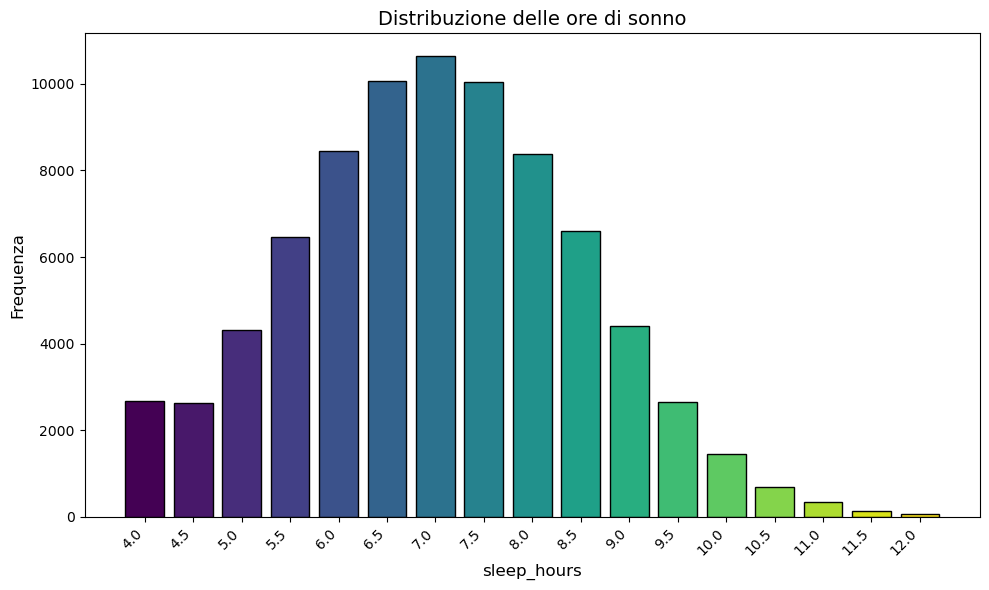

In [26]:
plot_bar(students, 'sleep_hours', n=30, 
         title='Distribuzione delle ore di sonno')

La maggior parte degli studenti dorme tra 6 e 8 ore a notte, con un picco a 7 ore. Sono pochi quelli che dormono meno di 5 o più di 9 ore. La curva è leggermente spostata verso destra a causa di un piccolo gruppo che dorme più a lungo.

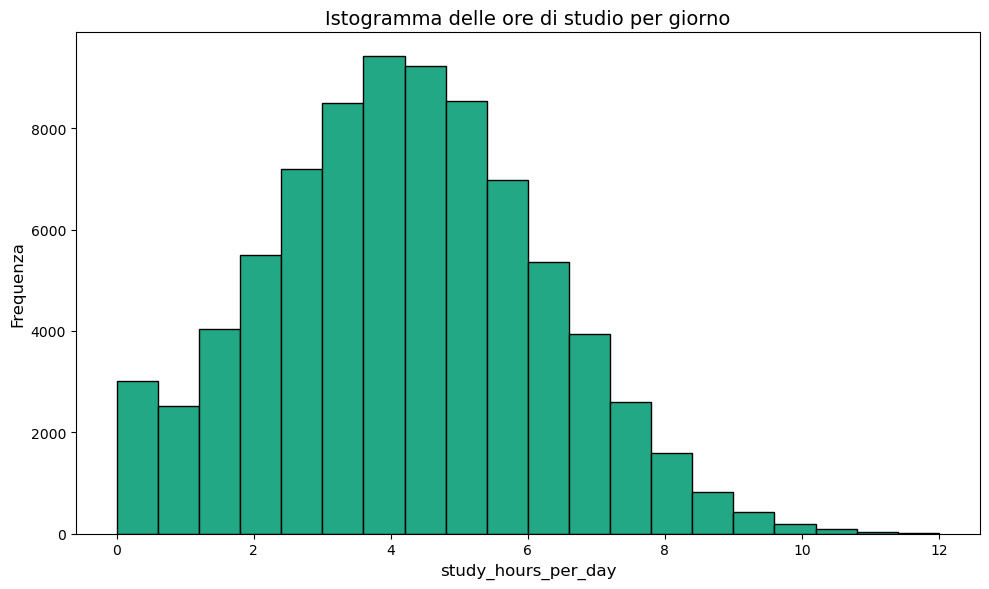

In [27]:
plot_hist(students, 'study_hours_per_day', bins=20, 
          title='Istogramma delle ore di studio per giorno')

La maggior parte degli studenti studia tra 2 e 6 ore al giorno, con un picco intorno alle 4 ore. Chi studia meno di un’ora o più di 8–9 ore è molto raro. La curva è un po’ spostata verso destra, perché c’è un piccolo gruppo di studenti che fa sessioni di studio più lunghe, ma la maggioranza si ferma a tempi moderati.

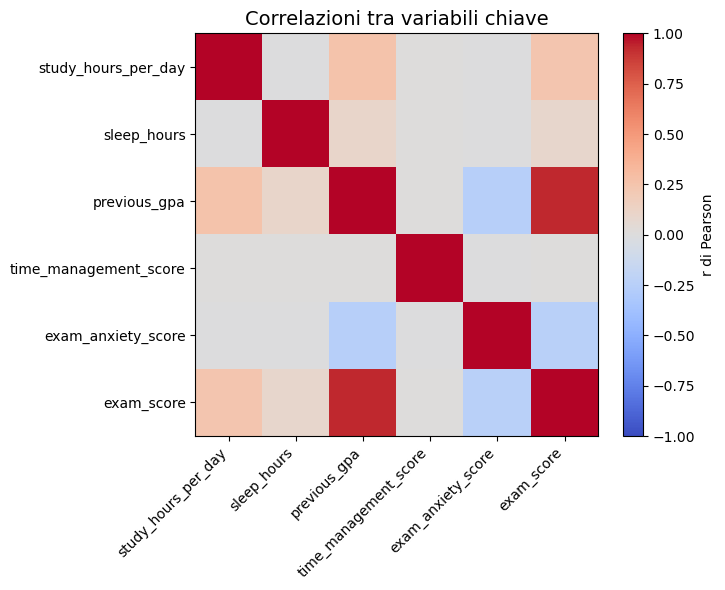

In [28]:
num_feats = [
    'study_hours_per_day', 'sleep_hours',
    'previous_gpa', 'time_management_score',
    'exam_anxiety_score', 'exam_score'
]
plot_correlation_heatmap(
    students,
    features=num_feats,
    title='Correlazioni tra variabili chiave'
)

Il grafico mostra quanto ogni variabile sia in correlazione con il punteggio d’esame:

* La media dei voti precedenti (previous\_gpa) è il fattore che predice meglio il risultato: più è alta, più sale anche il punteggio.
* Ore di studio e sonno aiutano un po’ (leggero effetto positivo), ma non in modo drammatico.
* L’ansia da esame fa l’opposto: più ansia, più basso tende a essere il punteggio.
* La gestione del tempo non sembra influire quasi per niente sui risultati.

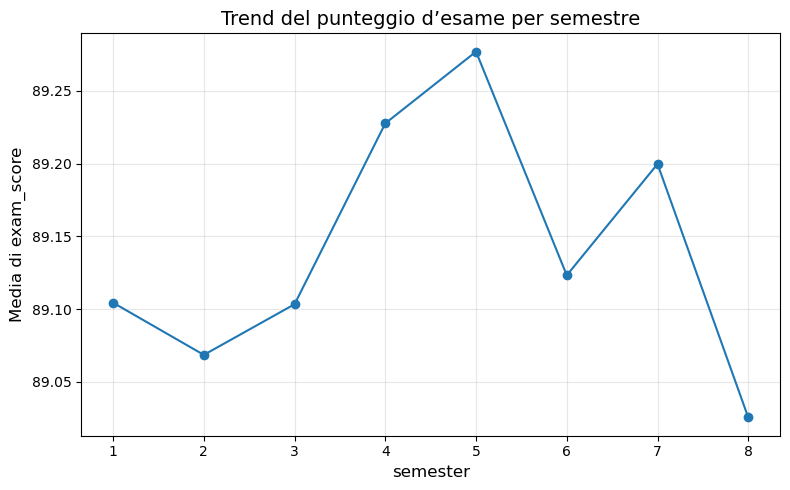

In [29]:
plot_line_trend(
    students,
    cat='semester',
    num='exam_score',
    title='Trend del punteggio d’esame per semestre'
)

Il grafico mostra che la media del punteggio d’esame rimane molto stabile intorno a 89 nel corso dei diversi semestri, con una lieve flessione nel secondo semestre, un picco nel quinto e un calo più marcato nell’ottavo. In generale, le variazioni sono contenute, suggerendo performance accademiche costanti durante tutto il percorso di studi.

#### Aspetto matematico

Il metodo `.describe()` di Pandas è uno strumento fondamentale per ottenere una rapida panoramica statistica delle colonne numeriche di un dataset. Analizziamo i valori che estrae:

1.  **`mean` (Media):** Dove si concentra la maggior parte dei dati per quella specifica variabile. Ad esempio, una `mean` di 22.00 per l'età indica che l'età media degli studenti nel dataset è di circa 22 anni.

2.  **`std` (Deviazione Standard):** Quanto sono omogenei o eterogenei i valori di una feature. Ad esempio, per `attendance_percentage`, un `std` di 17.33 è relativamente alto e suggerisce una notevole variabilità nella frequenza degli studenti.

1.  **`min` (Minimo):** Il limite inferiore del range di valori della feature. Ad esempio, il `min` di 4.00 per `sleep_hours` indica che ci sono studenti che dormono solo 4 ore al giorno.

2.  **`25%` (Primo Quartile o Q1):** Il confine inferiore del 50% centrale dei dati. Insieme alla mediana e al terzo quartile, aiuta a capire la distribuzione dei dati (se sono simmetrici o asimmetrici).

3.  **`50%` (Mediana o Secondo Quartile o Q2):** È una misura di tendenza centrale meno sensibile agli outlier rispetto alla media. Se media e mediana sono molto diverse, potrebbe indicare una distribuzione asimmetrica o la presenza di valori anomali.

4.  **`75%` (Terzo Quartile o Q3):** Il confine superiore del 50% centrale dei dati. La differenza tra Q3 e Q1 (intervallo interquartile) è un'altra misura di dispersione.

5.  **`max` (Massimo):** Il limite superiore del range di valori della feature. Ad esempio, un `max` di 12.00 per `study_hours_per_day` indica che ci sono studenti che studiano fino a 12 ore al giorno.

In [30]:
studentDescribed = students.describe()

rows_to_drop = ['count']
filtered_studentDescribed = studentDescribed.drop(index=rows_to_drop)

filtered_studentDescribed = filtered_studentDescribed.drop(columns=["student_id"])

segment_size = 5 

for start in range(0, len(filtered_studentDescribed.columns), segment_size):
    stop = start + segment_size
    display(filtered_studentDescribed.iloc[:, start:stop])

,age,study_hours_per_day,attendance_percentage,previous_gpa,semester
mean,22.004288,4.174388,69.967884,3.602448,4.497338
std,3.745570,2.004135,17.333015,0.462876,2.295312
min,16.000000,0.000000,40.000000,1.640000,1.000000
25%,19.000000,2.800000,55.000000,3.270000,2.000000
50%,22.000000,4.125624,69.900000,3.790000,5.000000
75%,25.000000,5.500000,84.900000,4.000000,7.000000
max,28.000000,12.000000,100.000000,4.000000,8.000000


,sleep_hours,exercise_frequency,mental_health_rating,stress_level,exam_anxiety_score
mean,7.017417,3.516587,6.804107,5.012478,8.508475
std,1.467377,2.291575,1.921579,1.953174,1.796411
min,4.000000,0.000000,1.000000,1.000000,5.000000
25%,6.000000,2.000000,5.500000,3.600000,7.000000
50%,7.000000,4.000000,6.900000,5.000000,10.000000
75%,8.000000,6.000000,8.200000,6.400000,10.000000
max,12.000000,7.000000,10.000000,10.000000,10.000000


,screen_entertainment_hours,screen_productivity_hours,social_activity,screen_time,motivation_level
mean,4.499120,5.173909,2.500225,9.673029,5.488525
std,1.845145,2.085923,1.704292,2.780869,2.867782
min,0.000000,0.000000,0.000000,0.300000,1.000000
25%,3.200000,3.700000,1.000000,7.800000,3.000000
50%,4.500000,5.200000,2.000000,9.700000,5.000000
75%,5.800000,6.600000,4.000000,11.600000,8.000000
max,9.000000,13.800000,5.000000,21.000000,10.000000


,time_management_score,exam_score
mean,5.499132,89.141350
std,2.603534,11.591497
min,1.000000,36.000000
25%,3.200000,82.000000
50%,5.500000,93.000000
75%,7.800000,100.000000
max,10.000000,100.000000


L'analisi descrittiva del dataset degli studenti rivela diverse tendenze e aspetti che meritano attenzione, fornendo un quadro approfondito delle caratteristiche accademiche, dello stile di vita e del benessere dei soggetti in esame:

**Performance Accademica e Impegno**

*   **Punteggio d'Esame (`exam_score`):** Con una media di **89.14** e un massimo di 100, la maggior parte degli studenti dimostra un rendimento molto elevato, imoltre una **Media Voti Precedente (`previous_gpa`)** di **3.60** e un massimo di 4.00 (il massimo raggiungibile) evidenziano un forte rendimento accademico passato della popolazione studentesca, stabilendo un'ottima base per la previsione.
*   **Ore di Studio al Giorno (`study_hours_per_day`):** La media è di **4.17** ore, indicando un impegno moderato per la maggior parte. Tuttavia, la presenza di un **massimo di 12.00 ore** suggerisce la presenza di *outlier* con un'enfasi estremamente elevata sulla preparazione accademica, il che potrebbe non sempre correlare linearmente con il successo o il benessere.
*   **Percentuale di Frequenza (`attendance_percentage`):** La media del **69.97%** con un minimo del **40.00%** e un'alta deviazione standard (17.33) rivela una discreta variabilità nella partecipazione alle lezioni, un fattore che può avere un impatto diretto sulla performance.
*   **Semestre (`semester`):** La media di **4.5** posiziona la maggior parte degli studenti a metà del loro percorso accademico, fornendo un contesto temporale utile per l'analisi.

**Benessere, Salute Mentale e Stile di Vita**

*   **Ore di Sonno (`sleep_hours`):** La media di **7.02 ore** è in linea con le raccomandazioni generali per l'età. Tuttavia, il dato più preoccupante è il **minimo di 4.00 ore**, che indica che una parte degli studenti soffre di grave privazione del sonno, con potenziali ripercussioni negative sulla salute mentale e sul rendimento.
*   **Frequenza Esercizio Fisico (`exercise_frequency`):** Una media di **3.52** volte a settimana suggerisce un impegno fisico regolare ma moderato. Il **minimo di 0** segnala la totale assenza di attività fisica per alcuni studenti, un fattore da monitorare per il benessere generale.
*   **Salute Mentale e Livello di Stress (`mental_health_rating`, `stress_level`):** La salute mentale media è valutata a **6.80 su 10**, mentre il livello di stress è mediamente **5.01 su 10**. Questo equilibrio suggerisce che, pur affrontando lo stress, gli studenti mantengono una salute mentale relativamente positiva.
*   **Punteggio Ansia da Esame (`exam_anxiety_score`):** Nonostante il livello di stress generale moderato, l'ansia specifica per gli esami è **significativamente elevata (media 8.51)**, con un 75% degli studenti che riporta un punteggio di 10.00. Questo evidenzia gli esami come una fonte predominante e intensa di pressione psicologica, che potrebbe impattare le performance.

**Abitudini Digitali e Sociali**

*   **Tempo Schermo (Intrattenimento vs. Produttività):** Gli studenti bilanciano il tempo schermo tra attività di intrattenimento (media **4.50 ore**) e produttive (media **5.17 ore**). Questo suggerisce una gestione consapevole dell'uso della tecnologia, fondamentale per la riuscita accademica.
*   **Attività Sociale (`social_activity`):** Con una media di **2.50 eventi sociali settimanali**, l'interazione sociale appare moderata. Sebbene questo non sia necessariamente negativo, una bassa attività sociale per alcuni studenti (minimo di 0) potrebbe essere un fattore da considerare nel contesto del benessere generale e nel rendimento sul lungo periodo.

**Competenze Trasversali e Supporto**

*   **Livello di Motivazione (`motivation_level`):** La motivazione media si attesta a **5.49**, indicando che circa metà degli studenti potrebbe mancare di una forte guida o interesse nei loro studi. L'ampia variabilità (std 2.87, min 1) suggerisce un gruppo a rischio di disengagement accademico.
*   **Punteggio Gestione del Tempo (`time_management_score`):** Una media di **5.50** suggerisce che le capacità di gestione del tempo sono moderate, con ampi margini di miglioramento per molti studenti. Questo è un fattore cruciale che potrebbe essere correlato sia allo stress che alle performance.


### Preparazione del modello
In questa sezione, prepareremo i dati per l'allenamento di un modello di machine learning. Seguiremo i seguenti passi:

1. **Gestione delle variabili categoriche**: Convertiremo le colonne categoriche in un formato numerico utilizzando tecniche come One-Hot Encoding.
2. **Selezione delle feature**: Identificheremo le colonne più rilevanti per predire il punteggio d'esame.
3. **Suddivisione dei dati**: Divideremo il dataset in set di addestramento e test.
4. **Standardizzazione dei dati numerici**: Trasformeremo i dati numerici per migliorare le performance del modello.

Importiamo le librerie necessarie per poter trasformare i dati che sono binari, ordinali e nominali ed anche per poter suddividere quelli che sono i dati utilizzati per il training e per la validation.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [32]:
binary_cols   = ['access_to_tutoring', 'part_time_job', 'dropout_risk', 'extracurricular_participation']
ordinal_cols  = ['parental_support_level', 'family_income_range',
                 'parental_education_level', 'diet_quality', 'internet_quality']
nominal_cols  = ['gender', 'major', 'learning_style', 'study_environment']
numerical_cols = students.select_dtypes(include=[np.number]) \
                         .columns.drop(['student_id','exam_score']) \
                         .tolist()

Definiamo le specifiche categorie per ciascun tipo di dato, così da definirgli dei valori ben precisi.

In [ ]:
binary_categories = [['No','Yes']] * len(binary_cols)

ord_categories = [
    list(map(str, range(1, 11))),
    ['Low', 'Medium', 'High'],
    ['High School','Some College','Bachelor','Master','PhD'],
    ['Poor','Fair','Good'],
    ['Low','Medium','High']
]

nominal_categories = [
    sorted(students[col].cat.categories.tolist())
    for col in nominal_cols
]

Creiamo ora gli encoder per poter trasformare, infine, le features non numeriche in numeriche tramite la logica descritta sopra.

In [34]:
binary_encoder  = OrdinalEncoder(categories=binary_categories)
ordinal_encoder = OrdinalEncoder(categories=ord_categories)
nominal_encoder = OrdinalEncoder(categories=nominal_categories)
scaler          = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('bin', binary_encoder,   binary_cols),
    ('ord', ordinal_encoder,  ordinal_cols),
    ('nom', nominal_encoder,  nominal_cols),
    ('num', scaler,           numerical_cols),
], remainder='drop')

#### Selezione delle feature
Per predire il punteggio d'esame (`exam_score`), selezioneremo le colonne più rilevanti. Escluderemo colonne come `student_id` che non hanno valore predittivo.

In [35]:
X = students.drop(columns=['student_id','exam_score'])
y = students['exam_score']

#### Suddivisione dei dati
Divideremo i dati in un set di addestramento (70%) e un set di test (30%) per valutare le performance del modello.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#### Standardizzazione dei dati numerici
Standardizzeremo le feature numeriche per garantire che tutte abbiano media zero e varianza unitaria. Questo è particolarmente utile per algoritmi sensibili alle scale delle variabili.

In [ ]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("Dimensioni del set di addestramento:", X_train_scaled.shape, y_train.shape)
print("Dimensioni del set di test:", X_test_scaled.shape, y_test.shape)

feature_names = (
    binary_cols
  + ordinal_cols
  + nominal_cols
  + numerical_cols
)

X_train_df = pd.DataFrame(
    X_train_scaled,
    columns=feature_names,
    index=X_train.index
)

print("Prime 5 righe del train preprocessato:")
X_train_df.iloc[:5]

Dimensioni del set di addestramento: (56000, 29) (56000,)
Dimensioni del set di test: (24000, 29) (24000,)
Prime 5 righe del train preprocessato:


,access_to_tutoring,part_time_job,dropout_risk,extracurricular_participation,parental_support_level,family_income_range,parental_education_level,diet_quality,internet_quality,gender,...,exercise_frequency,mental_health_rating,stress_level,exam_anxiety_score,screen_entertainment_hours,screen_productivity_hours,social_activity,screen_time,motivation_level,time_management_score
52511,0.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,2.0,1.0,...,0.209719,-2.192687,1.117051,0.831727,-0.757774,-0.276456,0.294844,-0.710089,-0.521934,-0.534490
36485,0.0,0.0,0.0,0.0,8.0,0.0,3.0,2.0,2.0,0.0,...,-0.226692,-0.314576,-0.263855,-0.835319,0.436450,1.450731,-0.880335,1.378203,0.872612,-0.073458
48982,0.0,0.0,0.0,0.0,7.0,2.0,1.0,2.0,2.0,1.0,...,-0.663104,0.467970,0.349881,0.831727,1.196411,1.210844,1.470024,1.702248,-0.870570,0.733349
31737,1.0,0.0,0.0,0.0,9.0,2.0,1.0,1.0,1.0,1.0,...,0.646130,0.154952,-1.235605,0.276045,-0.377794,1.306799,1.470024,0.730112,0.175339,0.502833
16731,1.0,0.0,0.0,1.0,9.0,2.0,0.0,1.0,2.0,1.0,...,0.646130,-0.888443,1.321630,0.831727,0.545016,0.539160,0.294844,0.766117,-0.521934,1.578575


### Preparazione dei modelli


In questa sezione, andremo a:

1. Scegliere e importare alcuni algoritmi di regressione.
2. Addestrare questi modelli sul X_train_scaled e y_train.
3. Fare previsioni sul X_test_scaled.
4. Valutare le performance dei modelli usando metriche di regressione appropriate.

Per la valutazione, useremo metriche comuni per i problemi di regressione:

- MAE (Mean Absolute Error): La media del valore assoluto degli errori. È facile da interpretare, indica l'errore medio in unità della variabile target.
- MSE (Mean Squared Error): La media dei quadrati degli errori. Penalizza maggiormente gli errori grandi.
- RMSE (Root Mean Squared Error): La radice quadrata del MSE. È nella stessa unità della variabile target ed è interpretabile.
- R² (R-squared): Il coefficiente di determinazione. Indica la proporzione della varianza nella variabile dipendente che è prevedibile dalle variabili indipendenti. Un valore più vicino a 1 indica un modello che spiega bene la variabilità dei dati.

Importiamo i modelli di nostro interessse

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

Importimo i metodi per ricavare le nostre metriche di valutazione

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Importiamo infine le Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore") 

Procediamo con i seguenti quattro passaggi su diversi modelli per poterli paragonare:
1. Creazione del modello
2. Addestramento del modello
3. Effettuare previsioni sul set di test
4. Valutazione delle performance

Cominciamo con un modello semplice come la Regressione Lineare per avere un punto di riferimento.

In [42]:
lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, y_train)

y_pred_lin_reg = lin_reg.predict(X_test_scaled)

mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mse_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)


Passiamo poi al modello Ridge, in questo modello appere un iperparametro 'alpha' che adremo ad identificare grazie all'utilizzo delle Pipeline.

1. Definiamo la Pipeline per Ridge, abbiamo già i dati scalati (X_train_scaled, X_test_scaled), quindi non includiamo StandardScaler nella pipeline qui.
2. Definizione della griglia di iperparametri da esplorare per Ridge, nello specifico 'alpha'. Esploriamo una gamma logaritmica di valori per alpha.
3. Eseguiamo la Grid Search sul training set.
4. Stampiamo infine gli iperparametri ottimali per Ridge

In [ ]:
pipeline_ridge = Pipeline([
    ('ridge', Ridge(random_state=42))
])

param_grid_ridge = {
    'ridge__alpha': np.logspace(-3, 2, 6) 
}

grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5,
                                 scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

grid_search_ridge.fit(X_train_scaled, y_train)

print("\nGrid Search per Ridge completata.")
print(f"Migliori parametri trovati per Ridge: {grid_search_ridge.best_params_}")
print(f"Miglior MAE (negativo) trovato in cross-validation per Ridge: {grid_search_ridge.best_score_:.2f}")

best_ridge_model = grid_search_ridge.best_estimator_
y_pred_best_ridge = best_ridge_model.predict(X_test_scaled)

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Grid Search per Ridge completata.
Migliori parametri trovati per Ridge: {'ridge__alpha': 0.001}
Miglior MAE (negativo) trovato in cross-validation per Ridge: -3.20


Ora che abbiamo ottenuto il valore ottimale per 'alpha' procedaimo all'utilizzo di Ridge.


In [44]:
ridge_reg = Ridge(alpha=0.001, random_state=42)

ridge_reg.fit(X_train_scaled, y_train)

y_pred_ridge_reg = ridge_reg.predict(X_test_scaled)

mae_ridge_reg = mean_absolute_error(y_test, y_pred_ridge_reg)
mse_ridge_reg = mean_squared_error(y_test, y_pred_ridge_reg)
rmse_ridge_reg = np.sqrt(mse_ridge_reg)
r2_ridge_reg = r2_score(y_test, y_pred_ridge_reg)

Ripetiamo il processo per un altro tipo di modello, ad esempio un Decision Tree. Inizialmente non andremo ad inserire iperparametri castom ma ci limiteromo asfruttare quelli di default per avere un termine di paragone futuro.

In [45]:
dt_reg_default = DecisionTreeRegressor(random_state=42)
dt_reg_default.fit(X_train_scaled, y_train)
y_pred_dt_reg_default = dt_reg_default.predict(X_test_scaled)

mae_dt_reg_default = mean_absolute_error(y_test, y_pred_dt_reg_default)
mse_dt_reg_default = mean_squared_error(y_test, y_pred_dt_reg_default)
rmse_dt_reg_default = np.sqrt(mse_dt_reg_default)
r2_dt_reg_default = r2_score(y_test, y_pred_dt_reg_default)

Notiamo risultsati abbastanza deludenti rispetto ai precedenti modelli

1. Definizione della Pipeline per DecisionTreeRegressor.
2. Definizione della griglia di iperparametri da esplorare per DecisionTreeRegressor.
3. Esecuzione della Grid Search sul training set.

In [46]:
pipeline_dt = Pipeline([
    ('dt_regressor', DecisionTreeRegressor(random_state=42)) 
])

param_grid_dt = {
    'dt_regressor__max_depth': [5, 10, 15, 20, None], 
    'dt_regressor__min_samples_leaf': [1, 5, 10, 20] 
}

grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5,
                              scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

grid_search_dt.fit(X_train_scaled, y_train)

print("\nGrid Search per DecisionTreeRegressor completata.")
print(f"Migliori parametri trovati per DecisionTreeRegressor: {grid_search_dt.best_params_}")
print(f"Miglior MAE (negativo) trovato in cross-validation per DecisionTreeRegressor: {grid_search_dt.best_score_:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Grid Search per DecisionTreeRegressor completata.
Migliori parametri trovati per DecisionTreeRegressor: {'dt_regressor__max_depth': 5, 'dt_regressor__min_samples_leaf': 1}
Miglior MAE (negativo) trovato in cross-validation per DecisionTreeRegressor: -3.23


In [47]:

dt_reg_opt = DecisionTreeRegressor(
    max_depth=5,           
    min_samples_leaf=1,    
    random_state=42        
)

dt_reg_opt.fit(X_train_scaled, y_train)

y_pred_dt_reg_opt = dt_reg_opt.predict(X_test_scaled)

mae_dt_reg_opt = mean_absolute_error(y_test, y_pred_dt_reg_opt)
mse_dt_reg_opt = mean_squared_error(y_test, y_pred_dt_reg_opt)
rmse_dt_reg_opt = np.sqrt(mse_dt_reg_opt)
r2_dt_reg_opt = r2_score(y_test, y_pred_dt_reg_opt)

Come per Decision Tree inizialmente non applichiamo iperparametri specifici ma ci limitiamo a sfruttare i default per avere un metro di misura efficace con il modello trinato con gli iperparametri ottimali. Tale modello non è più lineare ma è un modello basato su ensemble learning ideato sul concetto di Bagging (Bootstrap Aggregating).
 

Inizialmente non scegliamo un numero di alberi (n_estimators) e una profondità massima (max_depth) ma ci affidiamo a quelli di default del modello per avere un termine di paragone con le prestazioni basate sugli iperparametri ottenuti dall'utilizzo della pipeline. La profondità massima non è esplicitamente settata dunque si utilizzarà il valore di default none che permette una profondità massima indefinita ovvero che cresce fino a che tutte le foglie non sono pure (cioè, contengono un solo valore target, o tutti gli elementi in quella foglia hanno lo stesso valore target). Settiamo inoltre n_jobs a -1 così da usare tutti i core della CPU.

In [48]:
rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_reg.fit(X_train_scaled, y_train)

y_pred_rf_reg = rf_reg.predict(X_test_scaled)

mae_rf_reg = mean_absolute_error(y_test, y_pred_rf_reg)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
rmse_rf_reg = np.sqrt(mse_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

Notiamo che l'incremento delle prestazioni in termini di risultati non è minimamante rilevante in relazione alle risorse computazionili allocate in più, si denota dunque una scelta quantomeno opportuna dei dei valori iniziali per numero di alberi (n_estimators) e profondità massima (max_depth).

Proceduamo ora ad utilizzare le pipeline per ricavare gli iperparametri più opportuni con cui settare il nostro modello. 

1. Definiamo la pipeline (non includendo StandardScaler perché X_train_scaled è già scalato).
2. Definiamo la griglia di iperparametri da esplorare per RandomForest.
3. Restituzione dei migliori iperparametri per Random Forest.


In [ ]:
# ATTENZIONE: la seguente cella richiede molto tempo per essere eseguita dato che il dataset è molto grande

pipeline_rf = Pipeline([
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200], 
    'regressor__max_depth': [10, 20, None], 
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5,
                              scoring='neg_mean_absolute_error',
                              n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train_scaled, y_train)

print("\nGrid Search per RandomForest completata.")
print(f"Migliori parametri trovati: {grid_search_rf.best_params_}")
print(f"Miglior MAE (negativo) trovato in cross-validation: {grid_search_rf.best_score_:.2f}")


best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

'pipeline_rf = Pipeline([\n    (\'regressor\', RandomForestRegressor(random_state=42, n_jobs=-1))\n])\n\nparam_grid_rf = {\n    \'regressor__n_estimators\': [50, 100, 200], \n    \'regressor__max_depth\': [10, 20, None], \n    \'regressor__min_samples_leaf\': [1, 2, 4]\n}\n\ngrid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5,\n                              scoring=\'neg_mean_absolute_error\',\n                              n_jobs=-1, verbose=2)\n\ngrid_search_rf.fit(X_train_scaled, y_train)\n\nprint("\nGrid Search per RandomForest completata.")\nprint(f"Migliori parametri trovati: {grid_search_rf.best_params_}")\nprint(f"Miglior MAE (negativo) trovato in cross-validation: {grid_search_rf.best_score_:.2f}")\n\n\nbest_rf_model = grid_search_rf.best_estimator_\ny_pred_best_rf = best_rf_model.predict(X_test_scaled)'

In [50]:
rf_reg_opt = RandomForestRegressor(n_estimators=200,    
                               max_depth=10,         
                               min_samples_leaf=4,   
                               random_state=42,     
                               n_jobs=-1)            

rf_reg_opt.fit(X_train_scaled, y_train)


y_pred_rf_reg_opt = rf_reg_opt.predict(X_test_scaled)


mae_rf_reg_opt = mean_absolute_error(y_test, y_pred_rf_reg_opt)
mse_rf_reg_opt = mean_squared_error(y_test, y_pred_rf_reg_opt)
rmse_rf_reg_opt = np.sqrt(mse_rf_reg_opt)
r2_rf_reg_opt = r2_score(y_test, y_pred_rf_reg_opt)

Dopo l'utilizzo delle pipeline siamo riusciti ad identificare un set di iperparametri per Random Forest opportuno per i nostri scopi infatti massimizza le prestazioni mantenedo un utilizzo delle risorse computazionali decisamente basso.

In [51]:
xgb_reg = XGBRegressor(random_state=42, n_jobs=-1)

xgb_reg.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_reg.predict(X_test_scaled)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


In [52]:
pipeline_xgb = Pipeline([
    ('xgb', XGBRegressor(random_state=42, n_jobs=-1, verbosity=0))
])

param_grid_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 6, 10],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__subsample': [0.7, 1.0]
}

grid_search_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid_xgb,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search_xgb.fit(X_train_scaled, y_train)

print("\nGrid Search per XGBoost completata.")
print(f"Migliori parametri trovati: {grid_search_xgb.best_params_}")
print(f"Miglior MAE (negativo) trovato in cross-validation: {grid_search_xgb.best_score_:.2f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Grid Search per XGBoost completata.
Migliori parametri trovati: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 1.0}
Miglior MAE (negativo) trovato in cross-validation: -3.22


In [53]:
best_xgb_model = grid_search_xgb.best_estimator_

y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)

mae_xgb_opt = mean_absolute_error(y_test, y_pred_best_xgb)
mse_xgb_opt = mean_squared_error(y_test, y_pred_best_xgb)
rmse_xgb_opt = np.sqrt(mse_xgb_opt)
r2_xgb_opt = r2_score(y_test, y_pred_best_xgb)


In [ ]:
data = {
    'Modello': [
        'Linear Regression',
        'Ridge Regression',
        'Decision Tree (Default)',
        'Decision Tree (Ottimizzato)',
        'Random Forest (Default)',
        'Random Forest (Ottimizzato)',
        'XGBoost (Default)',
        'XGBoost (Ottimizzato)'
    ],
    'MAE': [
        mae_lin_reg,
        mae_ridge_reg,
        mae_dt_reg_default,
        mae_dt_reg_opt,
        mae_rf_reg,
        mae_rf_reg_opt,
        mae_xgb,
        mae_xgb_opt
    ],
    'MSE': [
        mse_lin_reg,
        mse_ridge_reg,
        mse_dt_reg_default,
        mse_dt_reg_opt,
        mse_rf_reg,
        mse_rf_reg_opt,
        mse_xgb,
        mse_xgb_opt
    ],
    'RMSE': [
        rmse_lin_reg,
        rmse_ridge_reg,
        rmse_dt_reg_default,
        rmse_dt_reg_opt,
        rmse_rf_reg,
        rmse_rf_reg_opt,
        rmse_xgb,
        rmse_xgb_opt
    ],
    'R-squared': [
        r2_lin_reg,
        r2_ridge_reg,
        r2_dt_reg_default,
        r2_dt_reg_opt,
        r2_rf_reg,
        r2_rf_reg_opt,
        r2_xgb,
        r2_xgb_opt
    ]
}

df_results = pd.DataFrame(data)

df_results = df_results.round(2)

print("--- Riepilogo Comparativo delle Prestazioni dei Modelli di Regressione ---")
print("\n") 

print(df_results.to_string(index=False))

--- Riepilogo Comparativo delle Prestazioni dei Modelli di Regressione ---


                    Modello  MAE   MSE  RMSE  R-squared
          Linear Regression 3.20 17.58  4.19       0.87
           Ridge Regression 3.20 17.58  4.19       0.87
    Decision Tree (Default) 4.47 36.20  6.02       0.73
Decision Tree (Ottimizzato) 3.24 17.47  4.18       0.87
    Random Forest (Default) 3.31 17.89  4.23       0.87
Random Forest (Ottimizzato) 3.23 17.43  4.18       0.87
          XGBoost (Default) 3.30 18.23  4.27       0.86
      XGBoost (Ottimizzato) 3.23 17.33  4.16       0.87



Sulla base dei risultati ottenuti, è possibile elaborare un’analisi comparativa dettagliata dei vari modelli di regressione impiegati, con l’obiettivo di individuare il più adatto al problema in esame, ovvero la previsione della performance accademica sulla base delle abitudini degli studenti.

### **1. Modelli Lineari: Linear Regression e Ridge Regression**

Entrambi i modelli lineari presentano prestazioni praticamente identiche: un MAE (Mean Absolute Error) di 3.20, un MSE (Mean Squared Error) di 17.58, un RMSE (Root Mean Squared Error) di 4.19, e un R² pari a 0.87. Questo risultato indica che l’introduzione della penalizzazione L2 nel modello Ridge non ha apportato benefici significativi rispetto alla regressione lineare semplice.

Questo suggerisce che i dati non soffrono di overfitting in modo critico e che la relazione tra le variabili indipendenti e la variabile target è ben rappresentata anche da un modello lineare semplice. I modelli lineari hanno inoltre il vantaggio dell’interpretabilità, rendendoli utili per comprendere l’impatto delle singole variabili predittive.

### **2. Modelli ad Albero: Decision Tree**

Il modello Decision Tree nella sua configurazione di default ha mostrato prestazioni sensibilmente inferiori rispetto agli altri modelli: il MAE è salito a 4.47 e l’R² è sceso a 0.73, indicando una minore capacità del modello di spiegare la variabilità dei dati.

Tuttavia, dopo un processo di ottimizzazione degli iperparametri, le prestazioni del Decision Tree migliorano significativamente: il MAE scende a 3.24, il MSE a 17.47, l’RMSE a 4.18 e l’R² torna a 0.87, in linea con i modelli lineari. Questo conferma che il modello ad albero può essere competitivo, ma solo se correttamente calibrato.

### **3. Modelli Ensemble: Random Forest**

Il modello Random Forest, basato su un approccio ensemble di alberi, offre già buone prestazioni nella configurazione di default (MAE = 3.31, R² = 0.87). Dopo l’ottimizzazione, le metriche migliorano ulteriormente: il MAE scende a 3.23 e l’RMSE a 4.18, mantenendo un R² pari a 0.87.

Questi risultati evidenziano che il Random Forest è un modello robusto, in grado di cogliere relazioni non lineari nei dati e di generalizzare bene anche con set di dati complessi o rumorosi. Rispetto al Decision Tree singolo, offre maggiore stabilità e accuratezza.

### **4. Modelli Gradient Boosting: XGBoost**

XGBoost, nella configurazione predefinita, presenta prestazioni leggermente inferiori rispetto agli altri modelli ensemble, con un MAE di 3.30 e un R² di 0.86. Tuttavia, a seguito dell’ottimizzazione, le sue prestazioni migliorano sensibilmente: il MAE raggiunge 3.23, il MSE scende a 17.33, l’RMSE a 4.16, e l’R² torna a 0.87.

È interessante notare che, dopo l’ottimizzazione, XGBoost ottiene i **migliori risultati assoluti** in termini di MSE e RMSE tra tutti i modelli testati. Questo lo rende particolarmente competitivo e adatto a scenari in cui è cruciale minimizzare l’errore quadratico medio, ad esempio per penalizzare più severamente gli errori elevati.

### **Conclusioni e Scelta del Modello**

Tutti i modelli ottimizzati (Decision Tree, Random Forest e XGBoost) raggiungono un R² pari a 0.87, suggerendo che spiegano una quota simile della varianza nella variabile dipendente. Tuttavia, considerando le metriche di errore assoluto e quadratico, **XGBoost ottimizzato risulta leggermente superiore**, con il valore più basso di MSE (17.33) e di RMSE (4.16).

Inoltre, i modelli ensemble, in particolare Random Forest e XGBoost, offrono maggiore flessibilità e capacità di cogliere relazioni non lineari, rendendoli più adatti a dataset eterogenei o con interazioni complesse tra le variabili predittive.

**Pertanto, sulla base dei risultati ottenuti, il modello consigliato è XGBoost** con utilizzo di iperparametri individuati con l'utilizzo di pipeline, che offre il miglior compromesso tra accuratezza, generalizzazione e robustezza. Tuttavia, se la semplicità e l’interpretabilità sono fattori determinanti nel contesto applicativo, anche la regressione lineare rappresenta un’alternativa valida con prestazioni molto vicine.


Procediamo dunque ad esportare il preprocessore e il modello per l'applicativo Flask, essendo che saranno 2 componenti fondamentali per la trasformazione dei dati e per la predizione finale.

In [ ]:

import joblib


joblib.dump(best_xgb_model, 'best_xgb_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

['best_xgb_model.pkl']

## Interpretazione della Conoscenza Appresa dal Modello

Andiamo ora ad interpretare quali sono le variabili più influenti per il nostro modello XGBoost con iperparametri ottimizzati. A differenza dei modelli lineari che utilizzano i coefficienti per indicare l'impatto e la direzione di una variabile, i modelli basati su alberi (come XGBoost e Random Forest) forniscono un'importanza delle feature (feature importance). Questo valore indica quanto una feature è stata utilizzata e ha contribuito a migliorare la previsione all'interno del modello, ma non indica direttamente la direzione ovvero non ci è dato sapere se un valore più alto della feature porta a un punteggio d'esame più alto o più basso, andremo ad estrapolare questa infrosmzione valutando il coinvolgimento vantaggioso o neno ai fini dell'apprendimento.

In [58]:
xgb_regressor = best_xgb_model.named_steps['xgb']
feature_importances = xgb_regressor.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("--- Feature più Importanti ---")
display(importance_df.head(10))

print("\n--- Feature meno Importanti ---")
display(importance_df.tail(10))

--- Feature più Importanti ---


,Feature,Importance
16,previous_gpa,0.977079
27,motivation_level,0.001341
21,stress_level,0.001274
19,exercise_frequency,0.001268
24,screen_productivity_hours,0.001243
20,mental_health_rating,0.001178
26,screen_time,0.001119
28,time_management_score,0.001068
14,study_hours_per_day,0.001055
18,sleep_hours,0.001044



--- Feature meno Importanti ---


,Feature,Importance
22,exam_anxiety_score,0.000641
0,access_to_tutoring,0.000619
5,family_income_range,0.000612
6,parental_education_level,0.000591
17,semester,0.000579
11,learning_style,0.000572
10,major,0.000421
7,diet_quality,0.000289
1,part_time_job,0.000000
2,dropout_risk,0.000000


### Analisi delle Feature più Importanti

Analizzando le feature importances calcolate dal modello XGBoost, emerge un quadro chiaro di quali variabili contribuiscono maggiormente alla predizione del punteggio d'esame:

*   **`previous_gpa` (Media Voti Precedente):** Con un'importanza sbalorditiva di **0.977**, la media voti precedente domina in modo schiacciante tutte le altre feature. Questo conferma pienamente la nostra intuizione iniziale e le osservazioni dall'analisi di correlazione: il rendimento accademico passato è, di gran lunga, il predittore più potente della performance futura. La quasi totalità della capacità predittiva del modello deriva da questa singola variabile, suggerendo che essa riassume una vasta gamma di fattori che influenzano la continuità del successo accademico.

Le restanti feature, pur avendo importanze molto più basse rispetto a `previous_gpa` (nell'ordine di 0.001), rappresentano comunque i secondi predittori più significativi, fornendo un contributo marginale ma comunque rilevante per affinare la previsione. Tra le più rilevanti identifichiamo:


*   **`motivation_level` (Livello di Motivazione):** Con un'importanza di 0.001341, la motivazione si posiziona come il secondo fattore più influente. Questo è coerente con la logica: uno studente motivato è più propenso a dedicare tempo allo studio, a gestire meglio lo stress e a perseverare.
*   **`stress_level` (Livello di Stress):** Molto vicino alla motivazione (0.001274), il livello di stress è un'altra variabile chiave. Sebbene l'importanza non indichi la direzione, è plausibile che un eccessivo stress possa ostacolare le prestazioni.
*   **`exercise_frequency` (Frequenza Esercizio Fisico):** Sorprendentemente, l'attività fisica (0.001268) emerge come un predittore più importante di quanto ci si potesse aspettare da un'analisi di correlazione semplice. Questo potrebbe indicare un beneficio indiretto dell'attività fisica sul benessere generale, sulla concentrazione e, di conseguenza, sul rendimento.

### Analisi delle Feature meno Importanti

Le feature con un'importanza molto bassa (tendente a zero) suggeriscono che il modello non le ha trovate particolarmente utili per distinguere tra i diversi punteggi d'esame.

*   **`part_time_job` e `dropout_risk` (importanza 0.000000):** Queste due feature mostrano un'importanza praticamente nulla.
    *   Per `part_time_job`, ciò potrebbe indicare che, nel contesto di questo dataset, avere un lavoro part-time non ha un impatto diretto e significativo sulla performance d'esame, oppure che il suo eventuale impatto negativo è già ben catturato da altre variabili più importanti come lo stress o le ore di studio disponibili.
    *   Per `dropout_risk`, la sua importanza zero è un'osservazione interessante. Poiché questa variabile è stata definita come "derivata da stress e motivazione", è molto probabile che il modello, avendo già accesso diretto a `stress_level` e `motivation_level` (entrambe tra le feature più importanti), non tragga alcun valore aggiuntivo dall'utilizzo di `dropout_risk`. Il modello preferisce utilizzare le fonti primarie di informazione da cui `dropout_risk` è stato calcolato.
*   **`exam_anxiety_score` (Punteggio Ansia da Esame):** Contrariamente a quanto ipotizzato inizialmente basandoci sulle correlazioni, l'ansia da esame mostra un'importanza sorprendentemente bassa (0.000641). Questo può essere dovuto a diversi fattori:
    *   **Redundancy:** L'informazione sull'ansia potrebbe essere già ampiamente catturata da `stress_level` e `mental_health_rating`, rendendo `exam_anxiety_score` ridondante per il modello.
    *   **Poca Variabilità Predittiva Rilevante:** Se gran parte degli studenti ha un'ansia da esame alta, questa variabile potrebbe non essere efficace nel differenziare tra studenti con performance diverse.

### Conclusioni sull'Interpretazione del Modello

L'analisi delle feature importances del modello XGBoost rivela che la **media voti precedente (`previous_gpa`) è il fattore determinante e quasi esclusivo** nella predizione della performance studentesca per questo dataset. Questo suggerisce che le performance accademiche tendono ad essere altamente coerenti nel tempo.

Le altre variabili, pur essendo considerate dal modello, apportano un contributo molto minore. Questo non invalida la loro importanza nel mondo reale per il successo dello studente, ma indica che il loro impatto predittivo sul `exam_score` è secondario rispetto alla storia accademica pregressa. Le intuizioni derivate dall'EDA riguardo a fattori come lo stress, la motivazione, l'attività fisica e la gestione del tempo sono comunque supportate, in quanto queste variabili emergono come i principali predittori "secondari". L'analisi ha anche evidenziato come alcune variabili derivate o con poca varianza rilevante (`dropout_risk`, `exam_anxiety_score`) possano perdere di importanza quando il modello ha accesso a feature più basilari e discriminanti.